In [1]:
import sys
sys.path.append("/home/ly/workspace/mmsa")
seed = 1000003
import numpy as np
import torch
from torch import nn
from torch import optim

np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
from models.text_cnn import *
from utils.train import *
from typing import *
from collections import Counter

from utils.load_raw_yelp import *
from utils.dataset import *
from utils.train import *
config

{'use_cuda': True,
 'task': 'CLS',
 'embedding_dim': 100,
 'embedding': None,
 'freeze_embedding': True,
 'filter_size': (2, 3, 4, 5),
 'filter_num': 50,
 'max_tokens': 512,
 'bias_init': 1.0,
 'use_img': True,
 'img_input_size': 4096,
 'img_output_size': 100,
 'img_num': 3,
 'output_size': 5,
 'dropout': 0.5}

In [2]:
%%time
batch_size = 64
workers = 4
train_set, valid_set, test_set= load_glove_data(config)
train_loader, valid_loader, test_loader = get_yelp_raw_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()
print(get_parameter_number(model))

_interval = 5
lr = 1e-3
epoches = 50
stoping_step = 5
optimizer = get_regal_optimizer(model, optim.AdamW, lr)

viz = get_Visdom()
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)
text_writer = VisdomTextWriter(viz, "Training")

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

res, model = train_visdom_v2(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer, text_writer,
                         _interval=_interval, early_stop=stoping_step)

eval_model_on_raw_yelp(model, loss, test_loader)

Setting up a new session...


{'Total': 4699705, 'Trainable': 481405}


No 1 epoch: 554it [00:17, 31.99it/s]
No 2 epoch: 554it [00:17, 31.93it/s]
No 3 epoch: 554it [00:17, 32.19it/s]
No 4 epoch: 554it [00:16, 32.63it/s]
No 5 epoch: 554it [00:17, 31.61it/s]
No 6 epoch: 554it [00:17, 31.38it/s]
No 7 epoch: 554it [00:17, 32.27it/s]
No 8 epoch: 554it [00:17, 31.72it/s]
No 9 epoch: 554it [00:17, 31.27it/s]
No 10 epoch: 554it [00:17, 31.02it/s]
No 11 epoch: 554it [00:17, 30.94it/s]


CPU times: user 2min 9s, sys: 16.7 s, total: 2min 25s
Wall time: 3min 36s


{'Boston': {'Accuracy': 0.5428571428571428,
  'F1': 0.5260070348850153,
  'Loss': 1.034261980132451},
 'Chicago': {'Accuracy': 0.5476923076923077,
  'F1': 0.5335187324423627,
  'Loss': 1.085441342133742},
 'Los Angeles': {'Accuracy': 0.5399463806970509,
  'F1': 0.527355046743433,
  'Loss': 1.0832968287429605},
 'New York': {'Accuracy': 0.5364431486880467,
  'F1': 0.5228090378660902,
  'Loss': 1.073031286317475},
 'San Francisco': {'Accuracy': 0.5350877192982456,
  'F1': 0.5226392086670175,
  'Loss': 1.078563762547677},
 'Total': {'Accuracy': 0.5391435011269722,
  'F1': 0.5261246791299214,
  'Loss': 1.0780297718757441}}

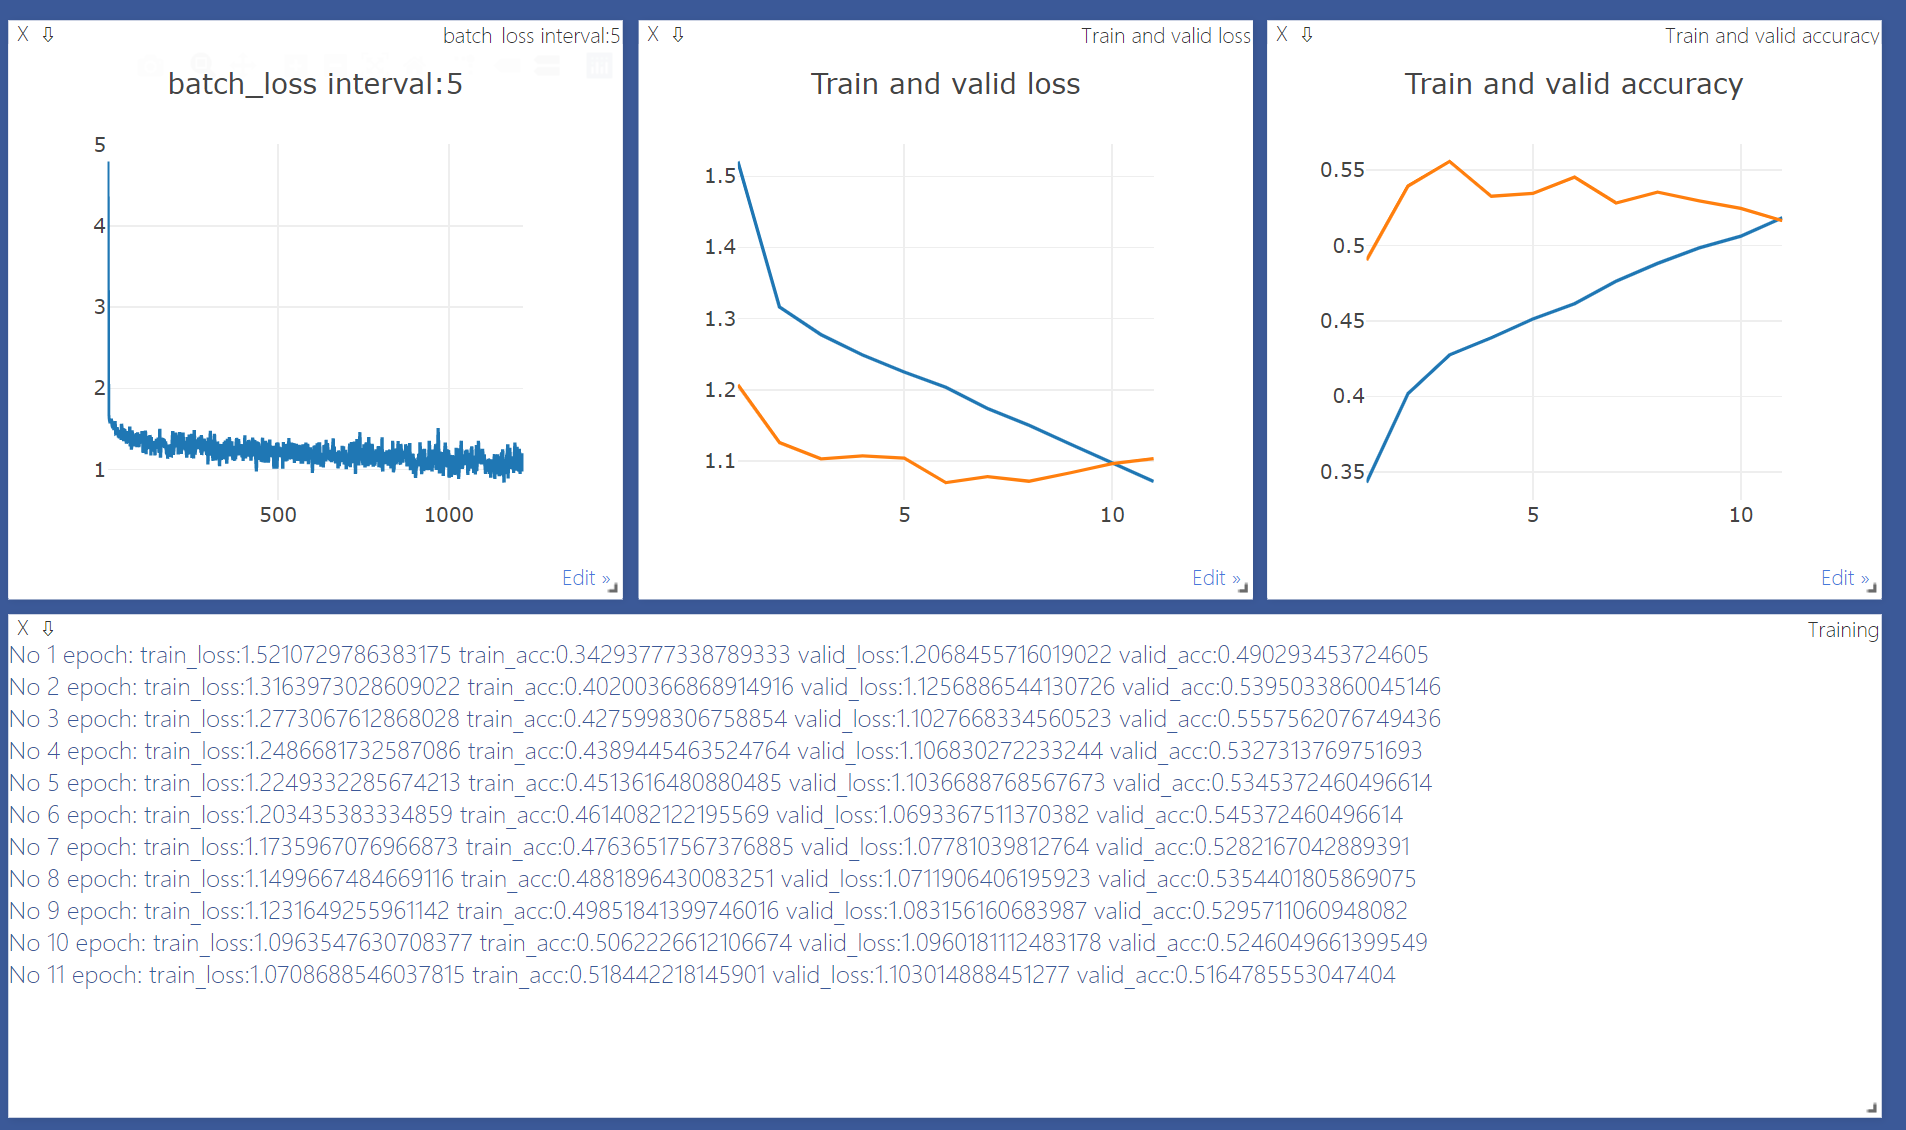